<a href="https://colab.research.google.com/github/Habibu-Ahmad/Modelling_Ribosome_Motion/blob/main/Ballistic/k_some_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

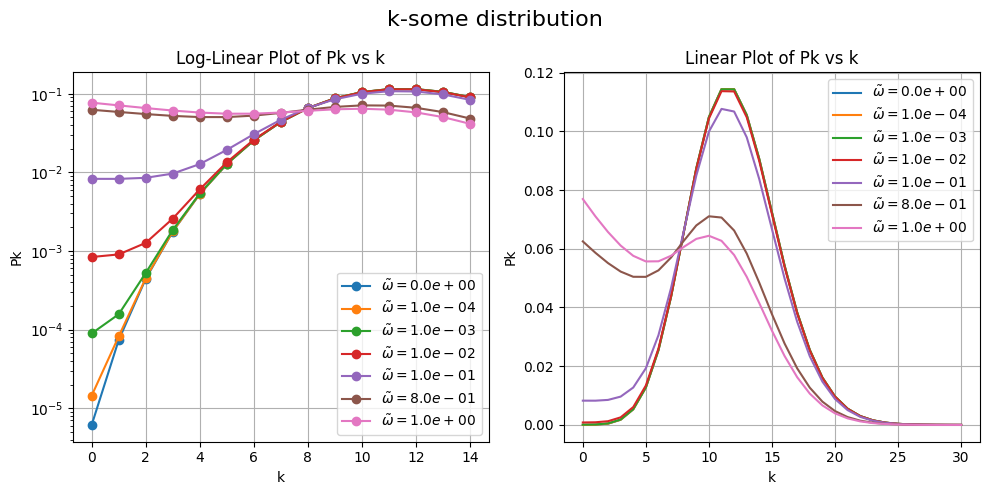

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma, gammainc, factorial

# Function to calculate Pk
def calculate_Pk(alpha, omega, k, t_L):
    term1 = (omega / (alpha + omega))
    term2 = ((alpha / (alpha + omega)) ** k)
    term3 = gammainc(k + 1, (alpha + omega) * t_L)
    term4 = np.exp(- (alpha + omega) * t_L)
    term5 = ((alpha * t_L) ** k) / factorial(k)
    P_k = term1 * term2 * term3 + term5 * term4
    return P_k

# Given values
alpha = 0.06
omega_values = [0.0, 0.0000005, 0.000005, 0.00005, 0.0005, 0.004, 0.005]
t_L = 200

#plot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create a figure with two subplots

# Original linear-linear plot (lin-lin)
k_values_linlin = np.arange(0, 31)

for omega in omega_values:
    P_k_values = [calculate_Pk(alpha, omega, k, t_L) for k in k_values_linlin]
    axs[1].plot(k_values_linlin, P_k_values, label=r'$\tilde \omega = {:.1e}$'.format(omega * 200))

axs[1].set_xlabel('k')
axs[1].set_ylabel('Pk')
axs[1].set_title('Linear Plot of Pk vs k') # Added title to the right subplot
axs[1].legend()
axs[1].grid(True)

# Logarithmic-linear plot (log-lin)
k_values_loglin = np.arange(0, 15)

for omega in omega_values:
    P_k_values = [calculate_Pk(alpha, omega, k, t_L) for k in k_values_loglin]
    axs[0].semilogy(k_values_loglin, P_k_values, 'o-', label=r'$\tilde \omega = {:.1e}$'.format(omega * 200))  # Use semilogy for logarithmic scale on y-axis

axs[0].set_xlabel('k')
axs[0].set_ylabel('Pk')
axs[0].set_title('Log-Linear Plot of Pk vs k') # Added title to the left subplot
axs[0].legend()
axs[0].grid(True)

plt.suptitle('k-some distribution', fontsize=16)  # Common title for both subplots
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()